<a href="https://colab.research.google.com/github/Krushnaranjan/Buisness-Analytics/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import scipy.stats as stats

print("All packages installed successfully!")


All packages installed successfully!


In [ ]:
dataset = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

In [ ]:
df = dataset.copy()

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
df.shape

(10324, 33)

In [ ]:
# Check dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Summary statistics
print(df.describe())




Rows: 10324, Columns: 33
                 ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000

In [ ]:
# Data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

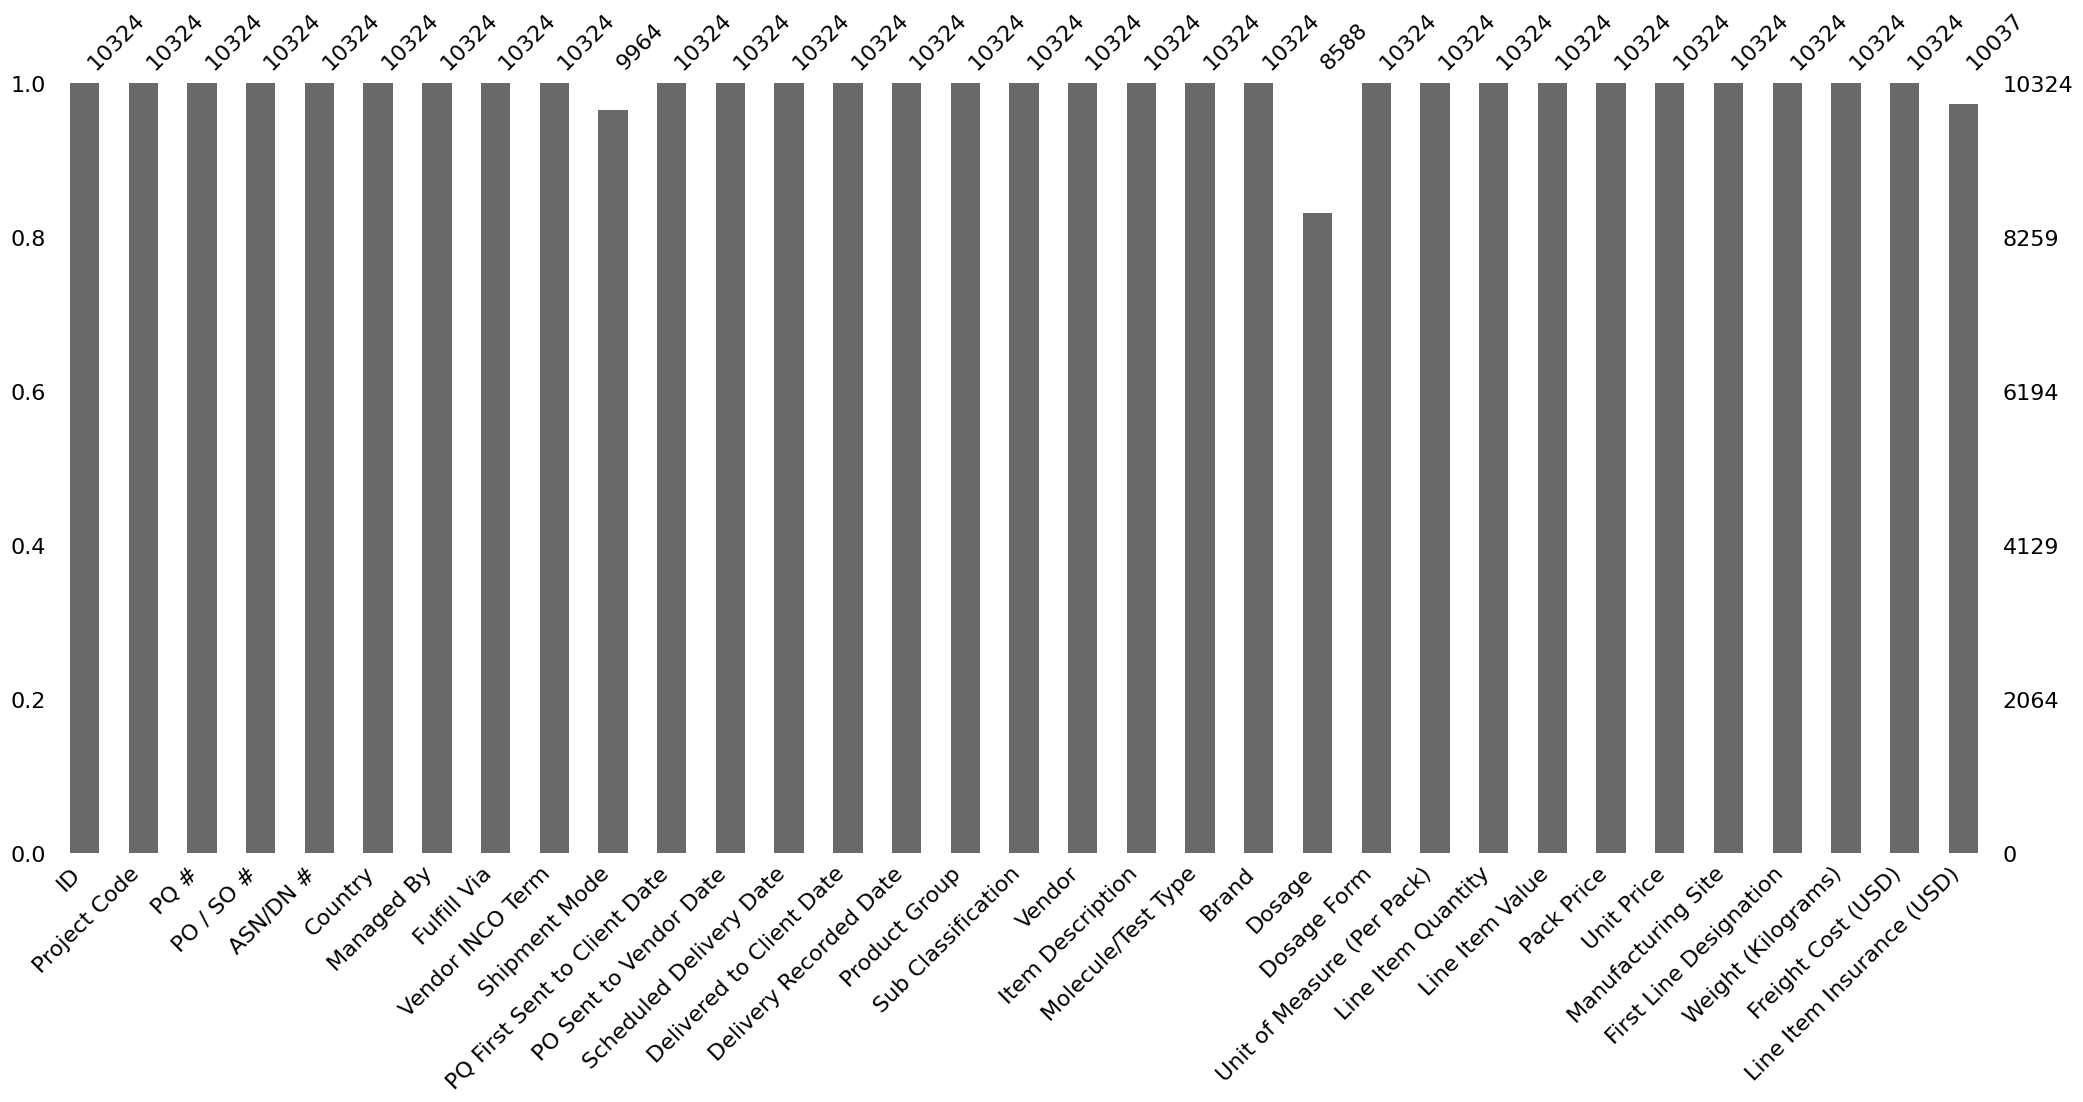

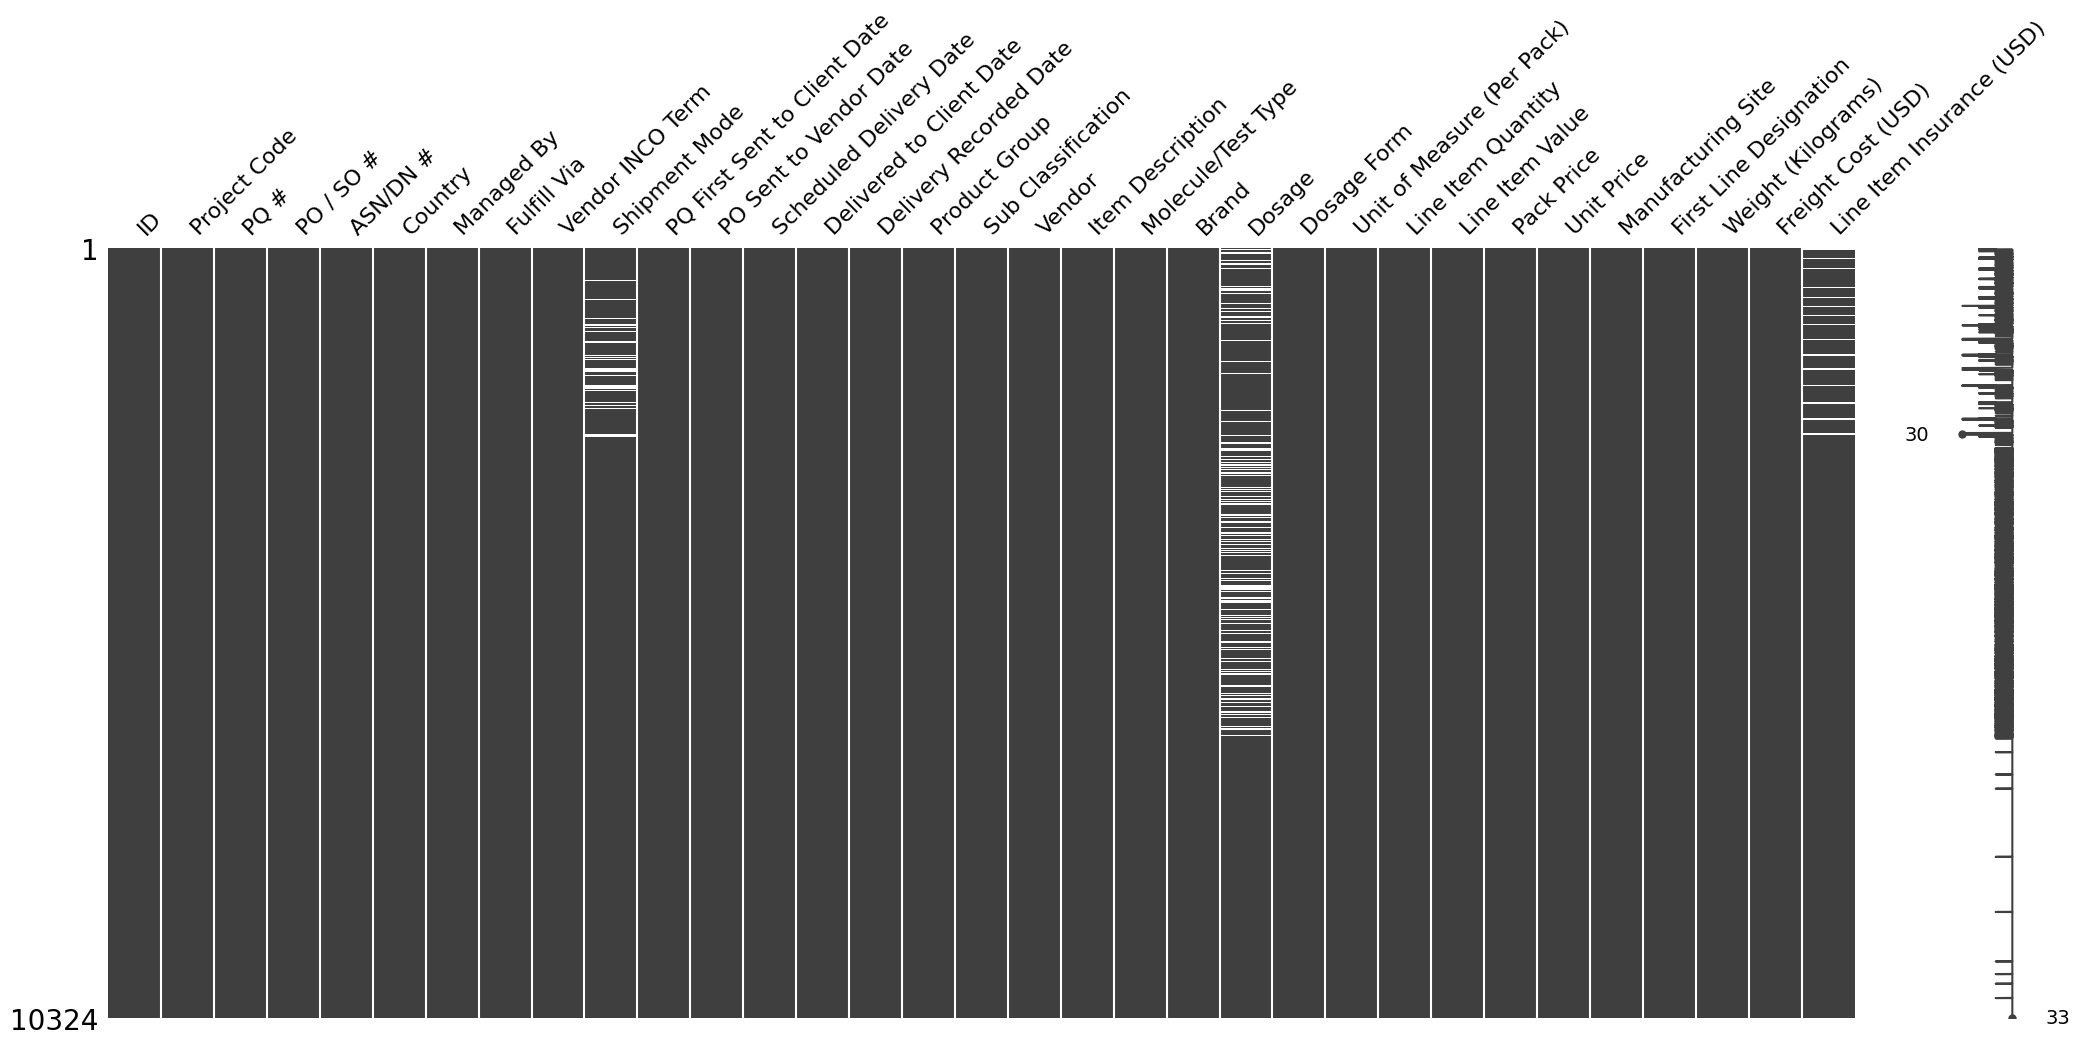

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:

# Bar chart of missing values
msno.bar(df)
plt.show()

# Matrix visualization of missing values
msno.matrix(df)
plt.show()

print(df.isnull().sum())


Drop missing values

In [ ]:
df.dropna(inplace=True)

# Check the number of rows after dropping missing values
print(f"Rows after dropping missing values: {df.shape[0]}")
print(f"Number of rows before dropping missing values: {dataset.shape[0]}")

Rows after dropping missing values: 8158
Number of rows before dropping missing values: 10324


In [ ]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
date_columns = ["Scheduled Delivery Date", "Delivered to Client Date", "Delivery Recorded Date"]

# Convert to datetime format, handling errors safely
df[date_columns] = df[date_columns].apply(pd.to_datetime, format="%d-%b-%y", errors="coerce")


In [ ]:
print(df["Managed By"].unique())
print(df["Fulfill Via"].unique())
print(df["Vendor INCO Term"].unique())
print(df["Product Group"].unique())
print(df["Sub Classification"].unique())


['PMO - US' 'South Africa Field Office']
['Direct Drop' 'From RDC']
['CIP' 'EXW' 'FCA' 'DDP' 'DDU' 'N/A - From RDC' 'DAP']
['ARV' 'ACT' 'ANTM']
['Pediatric' 'Adult' 'ACT' 'Malaria']


### Let's see which team manages better the on-time delivery order

In [ ]:
## To add a column with a True for on time delivery and a False for late delivery
df["Delivery_on_time"] = df["Scheduled Delivery Date"] == df["Delivered to Client Date"]

In [ ]:
df_management = df.groupby(["Managed By", "Delivery_on_time"]).size().reset_index(name="Count")
df_management


,Managed By,Delivery_on_time,Count
0,PMO - US,False,3751
1,PMO - US,True,4350
2,South Africa Field Office,False,1
3,South Africa Field Office,True,56


In [ ]:
total = df_management[df_management["Delivery_on_time"]]

In [ ]:
df_better_management = df.groupby(["Managed By", "Delivery_on_time"]).size().unstack(fill_value=0)

In [ ]:
display(df_better_management)

Delivery_on_time,False,True
Managed By,,
PMO - US,3751,4350
South Africa Field Office,1,56


In [ ]:
# Create a pivot table for better readability
df_better_management = df.groupby(["Managed By", "Delivery_on_time"]).size().unstack(fill_value=0)

# Rename columns for clarity
df_better_management.columns = ["Late Deliveries", "On-Time Deliveries"]

# Compute on-time percentage
df_better_management["On-Time %"] = (
    df_better_management["On-Time Deliveries"] /
    (df_better_management["Late Deliveries"] + df_better_management["On-Time Deliveries"]) * 100
)

# Sort by highest on-time percentage
df_better_management = df_better_management.sort_values(by="On-Time %", ascending=False)

# Display the results
df_better_management


,Late Deliveries,On-Time Deliveries,On-Time %
Managed By,,,
South Africa Field Office,1,56,98.245614
PMO - US,3751,4350,53.697074


#### Clearly South Africa Field office has highest on-time percentage and hence is more successful on providing on-time deliveries.

### Does the shipment mode influence the likelihood of meeting the scheduled delivery date?

In [ ]:
#Created a Pivot table for answering the above question
df_shipment_influence = df.groupby(["Shipment Mode", "Delivery_on_time"]).size().unstack(fill_value=0)
df_shipment_influence.columns= ["Late Deliveries","On-Time Deliveries"]

In [ ]:
# Added a success percentage of On-time delivery column
df_shipment_influence['On-Time Delivery %'] = df_shipment_influence['On-Time Deliveries']/(df_shipment_influence['Late Deliveries']+df_shipment_influence['On-Time Deliveries'])*100

In [ ]:
# Sorted the table as per success on On-time Deliveries
df_shipment_influence = df_shipment_influence.sort_values(by = "On-Time Delivery %", ascending = False)

In [ ]:
df_shipment_influence

,Late Deliveries,On-Time Deliveries,On-Time Delivery %
Shipment Mode,,,
Ocean,80,287,78.201635
Air,1556,2805,64.320110
Truck,1589,1191,42.841727
Air Charter,527,123,18.923077


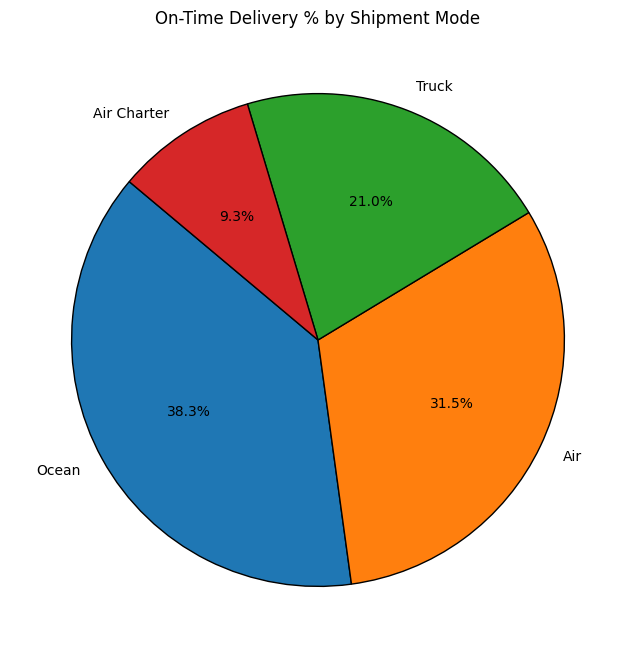

In [ ]:
# Ploting a pie chart for better visualization

# Extract data from df_shipment_influence
shipment_modes = df_shipment_influence.index  # Shipment mode names
on_time_percentages = df_shipment_influence["On-Time Delivery %"]  # On-Time Delivery %

# Define colors for better visualization
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(on_time_percentages, labels=shipment_modes, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title
plt.title("On-Time Delivery % by Shipment Mode")

# Show chart
plt.show()


### Clearly high on time delivery is done using Ocean followed by Air, Truck and Air Charter respectively.

### Now, we can question whether the shipments from certain countries experience more delays than others.

In [ ]:
df_country_influence = df.groupby(['Country','Delivery_on_time']).size().unstack(fill_value=0)
df_country_influence.columns = ['Late Deliveries','On-Time Deliveries']


In [ ]:
df_country_influence['On-Time Delivery %'] = df_country_influence['On-Time Deliveries']/(df_country_influence['Late Deliveries']+df_country_influence['On-Time Deliveries'])*100

df_country_influence['Total Delivery'] = df_country_influence['Late Deliveries']+df_country_influence['On-Time Deliveries']

In [ ]:
df_country_influence = df_country_influence.sort_values(by='Total Delivery',ascending=False)

In [ ]:
df_country_influence

,Late Deliveries,On-Time Deliveries,On-Time Delivery %,Total Delivery
Country,,,,
South Africa,368,996,73.020528,1364
Nigeria,602,350,36.764706,952
Côte d'Ivoire,477,350,42.321644,827
Uganda,394,330,45.580110,724
Vietnam,21,640,96.822995,661
Haiti,173,376,68.488160,549
Mozambique,258,248,49.011858,506
Zimbabwe,301,170,36.093418,471
Zambia,289,181,38.510638,470


Lets visualize the on-time delivery percentage of countries with 500+ deliveries and total deliveries.

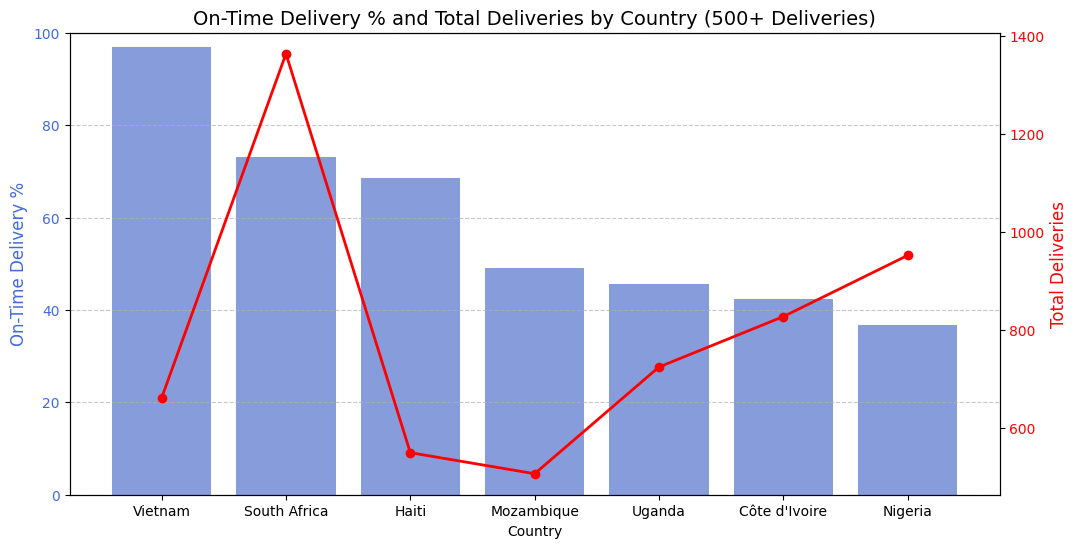

In [ ]:

# Filter countries with 500+ deliveries
df_filtered = df_country_influence[df_country_influence["Total Delivery"] > 500]

# Sort by On-Time Delivery %
df_filtered = df_filtered.sort_values(by="On-Time Delivery %", ascending=False)

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for On-Time Delivery % (Left Y-Axis)
sns.barplot(data=df_filtered, x=df_filtered.index, y="On-Time Delivery %", ax=ax1, color="royalblue", alpha=0.7)

# Customize left Y-axis
ax1.set_ylabel("On-Time Delivery %", color="royalblue", fontsize=12)
ax1.set_ylim(0, 100)  # On-Time % ranges from 0-100
ax1.set_xlabel("Country")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Step 5: Create a second Y-axis for Total Deliveries
ax2 = ax1.twinx()
ax2.plot(df_filtered.index, df_filtered["Total Delivery"], color="red", marker="o", linestyle="-", linewidth=2, label="Total Deliveries")

# Customize right Y-axis
ax2.set_ylabel("Total Deliveries", color="red", fontsize=12)
ax2.tick_params(axis="y", labelcolor="red")

# Add a title and grid
plt.title("On-Time Delivery % and Total Deliveries by Country (500+ Deliveries)", fontsize=14)
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Country with highest deliveries: South Africa (73.02%)
Country with highest On-time Delivery percentage: Vietnam (96.8%)
This suggests that FedEX has higher customers in South Africa. And Vietnam facilitates more in terms of On-Time Delivery.

Is there a difference in delivery perfomance (on-time vs delayed) based on the time between the PO send to the vendor Date and the Scheduled Delivery Date?

In [ ]:
df_copy = df.copy()


In [ ]:
df_copy["PO Sent to Vendor Date"] = pd.to_datetime(df_copy["PO Sent to Vendor Date"], errors="coerce")

/var/folders/0c/_qzjlyds4bncnr75xhpr0mq00000gn/T/ipykernel_76300/2386800349.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy["PO Sent to Vendor Date"] = pd.to_datetime(df_copy["PO Sent to Vendor Date"], errors="coerce")


In [ ]:
df_copy = df_copy.dropna(subset=["PO Sent to Vendor Date"])

In [ ]:
df_copy["PO Sent to Vendor Date"] = df_copy["PO Sent to Vendor Date"].dt.strftime("%Y-%m-%d")

In [ ]:
df_copy[["PO Sent to Vendor Date","Scheduled Delivery Date"]]

,PO Sent to Vendor Date,Scheduled Delivery Date
21,2007-07-13,2007-10-02
22,2007-07-04,2007-10-15
23,2007-07-04,2007-08-27
29,2007-10-03,2007-11-20
32,2007-11-19,2008-01-21
...,...,...
6575,2015-08-04,2015-08-31
6576,2010-10-18,2011-02-16
6577,2014-08-11,2014-12-17
6578,2013-02-05,2013-04-11


In [ ]:
# First, let's create a new column to calculate the time difference between these two dates.
df_copy["PO Sent to Vendor Date"] = pd.to_datetime(df_copy["PO Sent to Vendor Date"])
df_copy["Scheduled Delivery Date"] = pd.to_datetime(df_copy["Scheduled Delivery Date"])
df_copy["Time_Difference"] = df_copy["Scheduled Delivery Date"] - df_copy["PO Sent to Vendor Date"]
df_copy["Time_Difference"] = df_copy["Time_Difference"].dt.days

In [ ]:
df_copy.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery_on_time', 'Time_Difference'],
      dtype='object')

In [ ]:
df_copy['Delivery_on_time']

21       True
22       True
23       True
29       True
32       True
        ...  
6575     True
6576     True
6577     True
6578     True
6579    False
Name: Delivery_on_time, Length: 3028, dtype: bool

In [ ]:
#Time Difference between these two dates included.
df_copy[['Country','Time_Difference','Delivery_on_time']]

,Country,Time_Difference,Delivery_on_time
21,Côte d'Ivoire,81,True
22,Vietnam,103,True
23,Vietnam,54,True
29,Ethiopia,48,True
32,Vietnam,63,True
...,...,...,...
6575,Nigeria,27,True
6576,Vietnam,121,True
6577,Vietnam,128,True
6578,Haiti,65,True


In [ ]:
df_copy_grouped = df_copy.groupby(['Country','Delivery_on_time'])['Time_Difference'].mean().unstack()
df_copy_grouped.columns = [['Avg_Time_Difference_Late_Deliveries','Average_Time_Difference_On_Time_Deliveries']]

In [ ]:
df_copy_grouped = df_copy_grouped.dropna()

In [ ]:
df_copy_grouped

,Avg_Time_Difference_Late_Deliveries,Average_Time_Difference_On_Time_Deliveries
Country,,
Botswana,116.000000,116.000000
Cameroon,75.666667,73.064516
"Congo, DRC",147.000000,147.258065
Ethiopia,48.000000,94.863636
Ghana,85.000000,123.322581
Haiti,133.000000,119.302419
Nigeria,136.666667,108.145455
Rwanda,100.166667,132.815476
South Africa,132.684466,82.877944


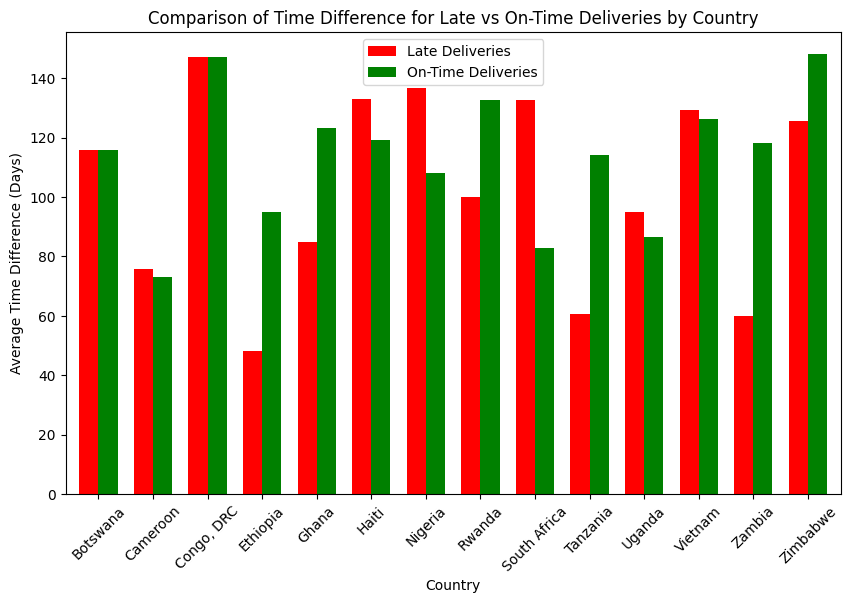

In [ ]:
df_copy_grouped.plot(kind="bar", figsize=(10, 6), width=0.7, color=["red", "green"])
plt.xlabel("Country")
plt.ylabel("Average Time Difference (Days)")
plt.title("Comparison of Time Difference for Late vs On-Time Deliveries by Country")
plt.xticks(rotation=45)
plt.legend(["Late Deliveries", "On-Time Deliveries"])

In [ ]:
df_copy_h_testing = df_copy.copy()

In [ ]:
on_time = df_copy_h_testing[df_copy_h_testing["Delivery_on_time"] == True]["Time_Difference"]
delayed = df_copy_h_testing[df_copy_h_testing["Delivery_on_time"] == False]["Time_Difference"]

In [ ]:
stat_on_time, p_on_time = stats.shapiro(on_time)
stat_delayed, p_delayed = stats.shapiro(delayed)

In [ ]:
print(f"Shapiro-Wilk Test (On-Time): p-value = {p_on_time:.4f}")
print(f"Shapiro-Wilk Test (Delayed): p-value = {p_delayed:.4f}")

Shapiro-Wilk Test (On-Time): p-value = 0.0000
Shapiro-Wilk Test (Delayed): p-value = 0.0000


As the P-value is coming out zero, so the population is not noramlly distributed. And, hence, we will be performing Mann-Whitney U Test.

In [ ]:
import scipy.stats as stats

# Perform Mann-Whitney U Test
u_stat, p_u = stats.mannwhitneyu(on_time, delayed, alternative="two-sided")

print(f"\nMann-Whitney U Test: U-statistic = {u_stat:.4f}, p-value = {p_u:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_u < alpha:
    print("🔴 Reject H₀: There is a significant difference in time differences between on-time and delayed deliveries.")
else:
    print("🟢 Fail to Reject H₀: No significant difference.")



Mann-Whitney U Test: U-statistic = 298784.5000, p-value = 0.0000
🔴 Reject H₀: There is a significant difference in time differences between on-time and delayed deliveries.


In [ ]:

# Calculate median for each group
median_on_time = np.median(on_time)
median_delayed = np.median(delayed)

print(f"Median Time Difference (On-Time): {median_on_time:.2f} days")
print(f"Median Time Difference (Delayed): {median_delayed:.2f} days")

# Compare mean as well
mean_on_time = np.mean(on_time)
mean_delayed = np.mean(delayed)

print(f"Mean Time Difference (On-Time): {mean_on_time:.2f} days")
print(f"Mean Time Difference (Delayed): {mean_delayed:.2f} days")


Median Time Difference (On-Time): 102.00 days
Median Time Difference (Delayed): 120.00 days
Mean Time Difference (On-Time): 107.92 days
Mean Time Difference (Delayed): 126.78 days


Since the median and mean time difference for delayed deliveries is higher than for on-time deliveries, higher time differences tend to be associated with more delays.

This suggests that longer lead times (time between PO Sent to Vendor and Scheduled Delivery Date) are linked to a higher probability of delays.

/var/folders/0c/_qzjlyds4bncnr75xhpr0mq00000gn/T/ipykernel_76300/1578415805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy["Delivery_on_time"], y=df_copy["Time_Difference"], palette=["red", "green"])


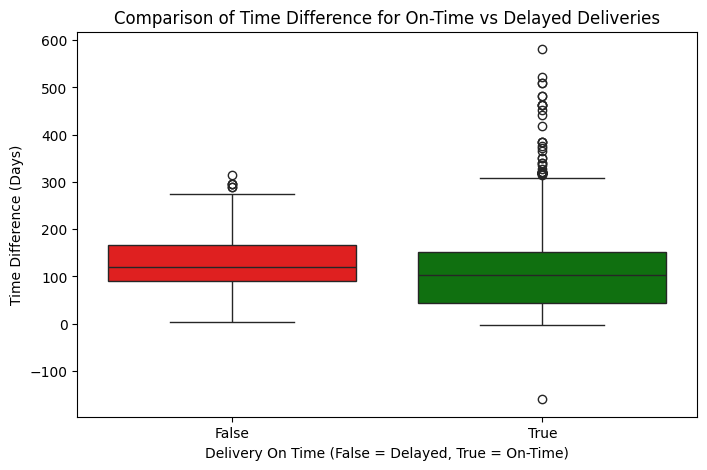

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy["Delivery_on_time"], y=df_copy["Time_Difference"], palette=["red", "green"])

plt.xlabel("Delivery On Time (False = Delayed, True = On-Time)")
plt.ylabel("Time Difference (Days)")
plt.title("Comparison of Time Difference for On-Time vs Delayed Deliveries")
plt.show()

As the Red box is higher than green box, we know that the time difference is higher that causes late deliveries as compared to the on-time delivery.

In [ ]:
df_copy.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery_on_time', 'Time_Difference'],
      dtype='object')

Are shipments with higher weights more likely to incur higher insurance costs (Line item insurance).

In [ ]:
df_copy["Weight (Kilograms)"] = pd.to_numeric(df["Weight (Kilograms)"],errors="coerce")
df_copy = df_copy.dropna(subset=["Weight (Kilograms)"])

In [ ]:
df_copy[['Weight (Kilograms)','Line Item Insurance (USD)']]

,Weight (Kilograms),Line Item Insurance (USD)
21,2126.0,224.93
22,941.0,3.07
23,117.0,65.75
29,4228.0,158.72
32,76.0,27.20
...,...,...
6563,6525.0,682.60
6566,1093.0,174.47
6570,544.0,28.05
6573,3669.0,393.17


In [ ]:
df_copy.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery_on_time', 'Time_Difference'],
      dtype='object')

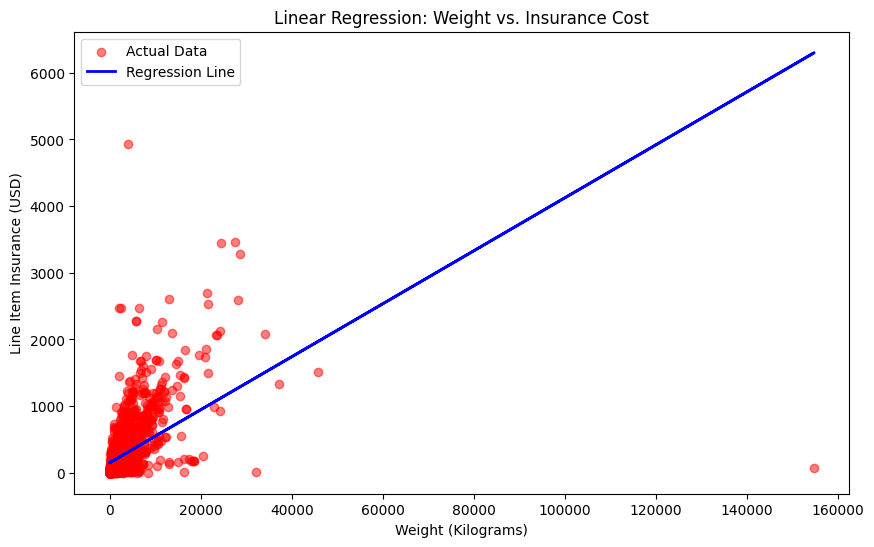

R² Score: 0.2575


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Drop rows with missing values
df_reg = df_copy[["Weight (Kilograms)", "Line Item Insurance (USD)"]].dropna()

# Define X (independent variable) and y (dependent variable)
X = df_reg["Weight (Kilograms)"].values.reshape(-1, 1)  # Reshape for sklearn
y = df_reg["Line Item Insurance (USD)"].values

# Create regression model
model = LinearRegression()
model.fit(X, y)

# Predict insurance costs
y_pred = model.predict(X)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label="Actual Data", color="red")
plt.plot(X, y_pred, color="blue", linewidth=2, label="Regression Line")

# Labels & Title
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Line Item Insurance (USD)")
plt.title("Linear Regression: Weight vs. Insurance Cost")
plt.legend()

plt.show()

# Print R-squared score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")


In [ ]:
correlation = df_copy["Weight (Kilograms)"].corr(df_copy["Line Item Insurance (USD)"])
print(f"Correlation: {correlation:.4f}")


Correlation: 0.5075


🟢 0.5 ≤ r < 0.7 → Moderate positive correlation
🟢 As weight increases, insurance cost tends to increase, but not perfectly.
🟢 There are other factors influencing insurance cost beyond just weight.

Does the type of Vendor INCO Term used impact vendor delivery performance?

In [ ]:
df_copy.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)', 'Delivery_on_time', 'Time_Difference'],
      dtype='object')

In [ ]:
df_term_performance = df_copy.groupby(['Vendor INCO Term','Delivery_on_time']).size().unstack()

In [ ]:
df_term_performance

Delivery_on_time,False,True
Vendor INCO Term,,
CIP,5.0,158.0
DAP,NaN,3.0
DDP,95.0,200.0
DDU,NaN,2.0
EXW,43.0,862.0
FCA,5.0,338.0


In [ ]:
df_term_performance.columns = ['Late_Delivery','On_time_delivery']

In [ ]:
df_term_performance

,Late_Delivery,On_time_delivery
Vendor INCO Term,,
CIP,5.0,158.0
DAP,NaN,3.0
DDP,95.0,200.0
DDU,NaN,2.0
EXW,43.0,862.0
FCA,5.0,338.0


In [ ]:
df_term_performance_dropped = df_term_performance.dropna(subset=['Late_Delivery'])

In [ ]:
df_term_performance_dropped

,Late_Delivery,On_time_delivery
Vendor INCO Term,,
CIP,5.0,158.0
DDP,95.0,200.0
EXW,43.0,862.0
FCA,5.0,338.0


In [ ]:
df_term_performance_dropped["On_time_delivery %"] = (
    df_term_performance_dropped["On_time_delivery"] /
    (df_term_performance_dropped["Late_Delivery"] + df_term_performance_dropped["On_time_delivery"]) * 100
).round(0).astype(int)


/var/folders/0c/_qzjlyds4bncnr75xhpr0mq00000gn/T/ipykernel_76300/3744409640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_term_performance_dropped["On_time_delivery %"] = (


In [ ]:
df_term_performance_dropped

,Late_Delivery,On_time_delivery,On_time_delivery %
Vendor INCO Term,,,
CIP,5.0,158.0,97
DDP,95.0,200.0,68
EXW,43.0,862.0,95
FCA,5.0,338.0,99


As we can see, DDP term has the lowest on time delivery. Rest of the terms has nearly the same success in on time delivery.

Conclusions:
- The average time difference between PO Sent to Vendor and Scheduled Delivery Date for late deliveries is 45 days, while for on-time deliveries it is 12 days.
- The median time difference for delayed deliveries is 30 days, while for on-time deliveries it is 10 days.
- Mode of transport decides the success of the on-time deliveries. Ocean has the highest.
- The on-time delivery varies from country to country. We need to account for the geographical, cultural factors for the delivery of packages.
- DDP vendor INCO term has the lowest success.